В этом ноутбуке мы разберем, чем отличается изображение с одним каналом от изображения с тремя каналами.

In [89]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Загружаем самый простой датасет

In [6]:
mnist_dataset = keras.datasets.mnist
(x_train , y_train) , (x_test , y_test) = mnist_dataset.load_data()

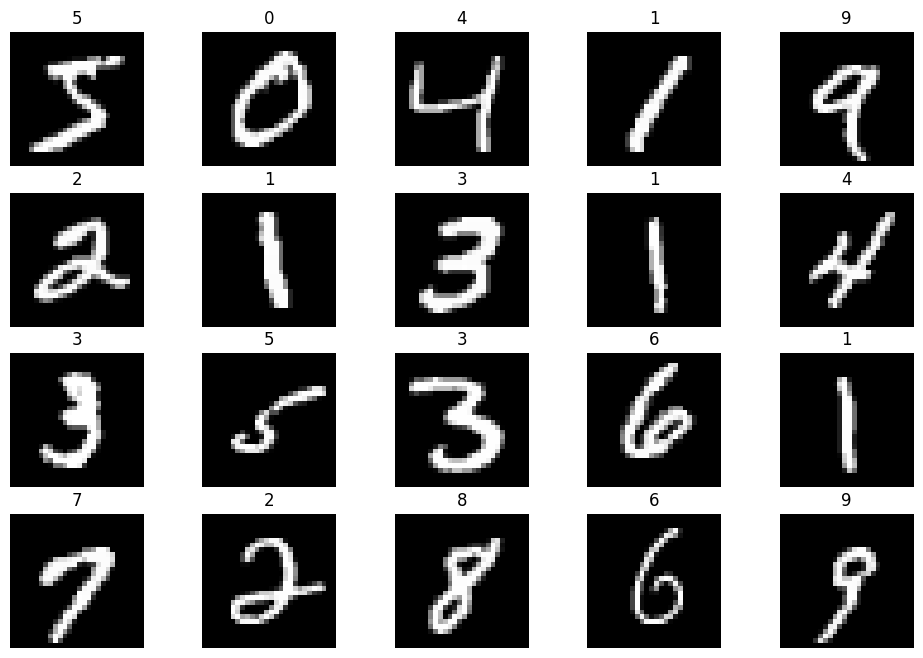

In [10]:
plt.figure(figsize = (12,8))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i],cmap = "gray")
  plt.title(y_train[i])
  plt.axis("off")
plt.show()

In [76]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [80]:
gray_num = x_train[0]
gray_num_table = pd.DataFrame(gray_num)

In [81]:
gray_num_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Тут можно видет что этот снимок похож на 5 - у и это правильно.

Это наша 5 - ка. Как мы можем видить тут все в числах от 0 до 255.
Но мы как ML engineer должны были преоброзовать их в от 0 до 1.
Мы обычно преобразуем изображения с диапазоном пикселей от 0 до 255 в диапазон от 0 до 1, чтобы улучшить стабильность и скорость обучения модели, особенно в нейронных сетях. Это позволяет ускорить процесс обучения и делает модели более устойчивыми, так как меньшие значения помогают избежать проблемы с большими градиентами и улучшить конвергенцию.

In [87]:
gray_num_normalized = (x_train[0]/255.0)
gray_num_normalized_table = pd.DataFrame(gray_num_normalized)
gray_num_normalized_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.070588,0.070588,0.070588,0.494118,0.533333,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,0.368627,0.603922,0.666667,0.992157,0.992157,0.992157,0.992157,0.992157,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.984314,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,0.992157,0.992157,0.992157,0.992157,0.776471,0.713725,0.968627,0.945098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,0.419608,0.992157,0.992157,0.803922,0.043137,0.000000,0.168627,0.603922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Вот так выглядит нормализованное изоброжение у которого все один цветовой канал

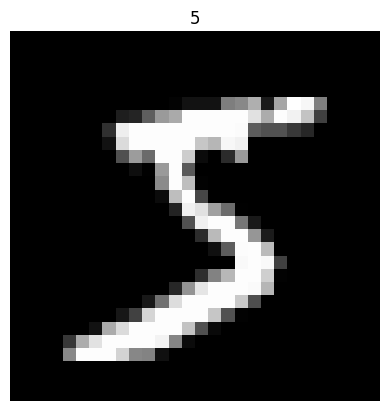

In [27]:
plt.imshow(x_train[0] , cmap = "gray")
plt.axis("off")
plt.title(y_train[0])
plt.show()

Вот так она выглядит в реальной жизни.
Важная особенность этих снимков что она имеет всего один канал.
То есть у нее есть только один цветовой канал.В ячейке где написано 0 - это озночает что в этой ячейке цвет черный , а где 1 то цвет белый.
У вас может возникнуть законный вопрос а что будет если 0.5?
Да это правильно,0.5 это озночает что-то между черным и белым и так далее.

У нас в датасете такие image будут храниться вот в таком порядке (batch , height , width , channels = 1) .
Тут batch - это сколько изображений храниться в одном батче
height - длина изображний
width - ширина изображений
channels - 1, это цветовой канал

# Смотрим на изображений у которого 3 цветовых канала

In [31]:
cifar10 = keras.datasets.cifar10
(x_train_cifar10 , y_train_cifar10) , (x_test_cifar10 , y_test_cifar10) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


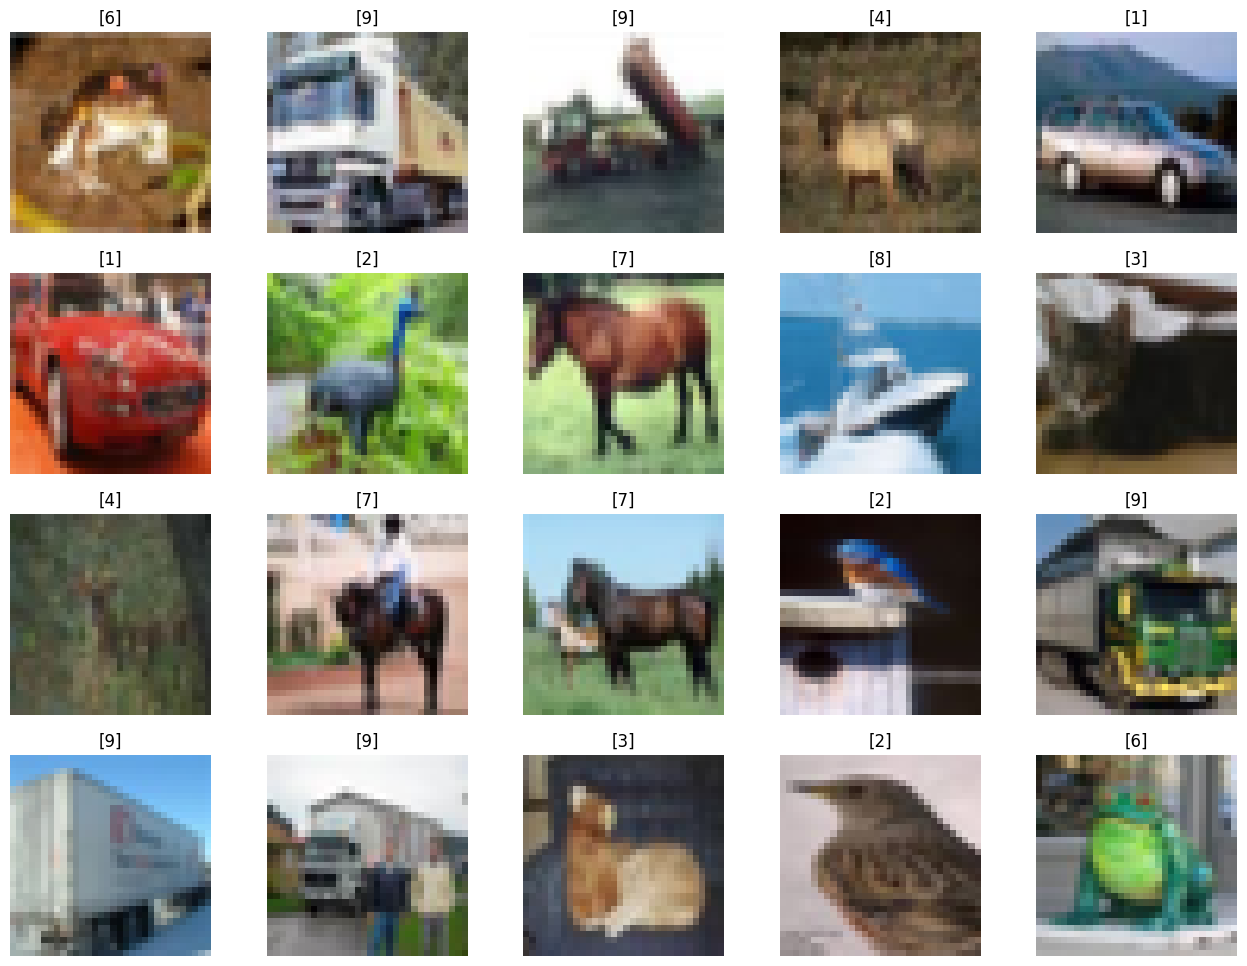

In [33]:
plt.figure(figsize = (16,12))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train_cifar10[i],cmap = "gray")
  plt.title(y_train_cifar10[i])
  plt.axis("off")
plt.show()

In [60]:
red_channel = x_train_cifar10[0][:,:,0]
green_channel = x_train_cifar10[0][:,:,1]
blue_channel = x_train_cifar10[0][:,:,2]

In [61]:
print(red_channel)

[[ 59  43  50 ... 158 152 148]
 [ 16   0  18 ... 123 119 122]
 [ 25  16  49 ... 118 120 109]
 ...
 [208 201 198 ... 160  56  53]
 [180 173 186 ... 184  97  83]
 [177 168 179 ... 216 151 123]]


In [62]:
print(green_channel)

[[ 62  46  48 ... 132 125 124]
 [ 20   0   8 ...  88  83  87]
 [ 24   7  27 ...  84  84  73]
 ...
 [170 153 161 ... 133  31  34]
 [139 123 144 ... 148  62  53]
 [144 129 142 ... 184 118  92]]


In [63]:
print(blue_channel)

[[ 63  45  43 ... 108 102 103]
 [ 20   0   0 ...  55  50  57]
 [ 21   0   8 ...  50  50  42]
 ...
 [ 96  34  26 ...  70   7  20]
 [ 96  42  30 ...  94  34  34]
 [116  94  87 ... 140  84  72]]


In [67]:
red_channel_table = pd.DataFrame(red_channel)
green_channel_table = pd.DataFrame(green_channel)
blue_channel_table = pd.DataFrame(blue_channel)

Оттенок красного канала

In [73]:
red_channel_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148
1,16,0,18,51,88,120,128,127,126,116,106,101,105,113,109,112,119,109,105,125,127,122,131,124,121,131,132,133,133,123,119,122
2,25,16,49,83,110,129,130,121,113,112,112,106,105,128,124,130,127,122,115,120,130,131,139,127,126,127,130,142,130,118,120,109
3,33,38,87,106,115,117,114,105,107,121,125,109,113,146,133,127,118,117,127,122,132,137,136,131,124,130,132,135,130,125,121,94
4,50,59,102,127,124,121,120,114,107,125,129,106,108,124,121,108,98,110,117,120,134,140,131,141,135,127,121,119,103,87,75,67
5,71,84,110,129,136,131,129,119,108,122,123,105,107,111,108,98,94,97,83,88,102,97,88,118,140,136,120,107,88,67,35,32
6,97,111,123,130,136,132,122,121,127,138,124,120,107,80,68,74,101,105,65,58,63,78,136,122,139,151,129,108,95,96,89,66
7,115,119,130,140,133,127,138,137,131,133,134,108,72,51,41,72,181,209,125,68,64,82,123,112,135,151,137,114,105,101,126,102
8,137,128,132,128,119,123,128,130,121,137,131,74,54,50,44,86,203,217,162,100,77,75,74,76,107,135,135,129,127,119,125,134
9,154,154,156,140,123,125,126,127,133,132,90,63,62,70,79,103,152,148,141,121,101,96,86,75,101,136,136,134,133,132,128,133


Оттенов зеленого канала

In [74]:
green_channel_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,62,46,48,54,73,91,107,110,117,120,103,99,115,112,105,97,106,106,97,113,112,105,105,108,120,131,136,129,130,132,125,124
1,20,0,8,27,51,82,89,86,87,79,70,67,70,74,70,72,79,71,69,89,92,85,89,82,79,89,91,94,96,88,83,87
2,24,7,27,50,72,92,93,82,77,78,79,75,73,92,87,92,89,85,79,85,95,96,102,90,89,89,92,105,94,84,84,73
3,25,20,54,63,70,74,72,62,68,84,90,75,77,105,91,84,76,76,87,81,92,99,99,93,86,91,90,93,90,87,85,62
4,32,32,65,79,77,77,78,74,72,88,89,68,71,83,78,68,65,74,80,80,93,106,95,98,92,84,79,79,67,57,47,42
5,48,53,73,82,88,84,84,77,70,82,81,65,72,77,74,65,62,63,56,58,68,69,54,74,96,97,80,68,54,39,10,13
6,69,75,85,84,88,83,74,74,83,94,79,79,71,50,43,41,51,56,37,36,37,51,93,68,86,106,87,68,59,63,61,47
7,82,76,90,97,88,81,90,89,86,89,91,70,39,26,22,31,102,127,76,40,38,53,77,56,81,103,95,76,69,66,92,74
8,100,82,91,87,81,82,85,85,80,97,94,42,25,29,29,39,106,109,90,58,42,43,39,35,67,96,97,91,89,83,86,95
9,120,112,114,100,89,86,86,91,97,97,60,35,33,39,50,53,70,64,79,75,58,54,48,38,63,91,92,93,93,93,86,92


Оттенок синего канала

In [75]:
blue_channel_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,63,45,43,42,52,63,75,80,89,93,77,76,91,86,79,71,79,76,64,78,75,69,74,77,89,100,108,102,104,108,102,103
1,20,0,0,8,21,43,45,44,50,44,37,35,36,35,33,37,44,33,27,46,46,39,47,41,37,48,53,58,60,55,50,57
2,21,0,8,23,41,54,55,47,43,44,46,45,38,48,47,56,56,51,43,47,54,55,62,51,49,50,53,68,58,50,50,42
3,17,4,25,28,33,35,37,33,33,45,53,40,38,58,47,45,40,41,52,43,51,58,57,52,44,50,49,51,50,50,48,35
4,21,11,34,39,36,36,40,39,34,49,51,31,33,42,39,29,23,37,49,41,50,66,58,66,51,45,41,40,32,27,23,25
5,29,24,37,38,45,42,43,37,33,44,39,25,31,31,34,27,21,32,38,36,42,46,36,72,79,64,45,34,24,15,0,4
6,40,36,43,38,44,40,30,31,46,54,34,39,34,14,17,17,21,23,16,19,18,31,83,80,79,69,49,36,29,37,38,30
7,49,33,47,53,48,40,47,46,48,46,46,39,19,10,14,17,69,81,47,23,17,30,62,55,60,61,54,39,34,33,59,46
8,68,41,51,48,44,43,44,44,40,54,53,20,16,16,18,15,56,62,71,49,27,24,24,22,36,59,58,49,48,43,45,56
9,89,77,82,65,53,50,48,52,60,68,30,9,16,20,30,26,33,37,61,57,41,33,24,21,32,53,53,50,52,52,45,55


Как мы можем видеть 3 цветных изображние есть 3 цветовых канала,что делает ее тренеровку более сложной так как у такого рода датасетов shape выглядит таким
(batch , height , width , channels = 3).
Думаю вы читали что я писал выще и знаете что все это озночает , но мы пройдемся по channels.
Тут у нас есть 3 канала , 1 - й канал : Red, то есть это озночает что сколько красных оттенков у нас есть (0 - нету , 255 - самый пик красного цвета).
2 - й канал : Green , это оттенок зеленого цвета,работает точно так же как красный,
3 - й канал : Blue , это оттенок синего цвета, работает точно так же как красный.

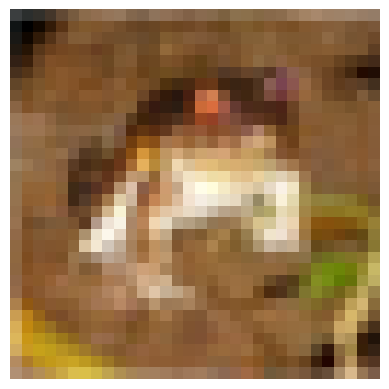

In [88]:
plt.imshow(x_train_cifar10[0])
plt.axis("off")
plt.show()

Вот так выглядит наше изображение у которого мы рассматривали его 3 канала.

Надеюсь вам было понятно мое обьяснение.Если понравилось пожалуйста поделитесь с друзьями,СПС.